# Tutorial 1: Data Plotting and Fitting

For your first session, you will mainly familiarize yourself with the basic software.
First we will learn how to plot and analyze data via a free python interface.

## Learning Objectives

By the end of this tutorial, you will be able to:

- Load TXT files into a python pandas DataFrame.
- Generate plots from experimental data.
- Define basic python functions.
- Fit experimental data using python.
- Use metrics to diagnose the quality of fit results.
- Linearize nonlinear data to improve fit results.


## 1. Import Libraries

Python is a general purpose language, and there is allot you can do with it. For
scientific computing, the most important packages are

```python
matplotlib  -> # General purpose plotting
numpy       -> # High dimensional matrices, and fast math operations
pandas      -> # Working with tabular data
scipy       -> # Using pre built scientific functions
```

We will import these libraries when they become important


In [ ]:
from ezfit.examples import generate_linear_data

df_line = generate_linear_data(
    n_points=50, slope=2.0, intercept=1.0, noise_level=0.5, seed=42
)

First 5 rows of data:
          x         y  yerr
0  0.000000  1.248357   0.5
1  0.204082  1.339031   0.5
2  0.408163  2.140171   0.5
3  0.612245  2.986005   0.5
4  0.816327  2.515576   0.5


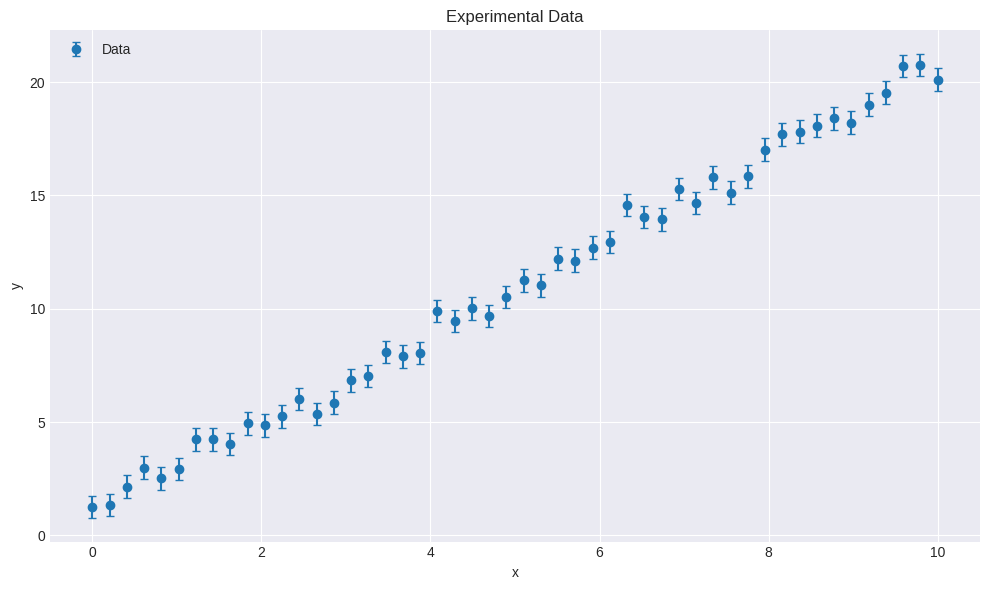

In [ ]:
from ezfit.examples import generate_linear_data

# Generate data: y = 2*x + 1 with noise
df = generate(n_points=50, slope=2.0, intercept=1.0, noise_level=0.5, seed=42)

# Display first few rows
print("First 5 rows of data:")
print(df.head())

# Plot the data
fig, ax = plt.subplots()
ax.errorbar(df["x"], df["y"], yerr=df["yerr"], fmt="o", capsize=3, label="Data")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Experimental Data")
ax.legend()
plt.tight_layout()
plt.show()

## 3. Define a Model Function

In ezfit, you define your model as a Python function. The first argument must be the independent variable (x), followed by the parameters you want to fit.


In [ ]:
def line(x, m, b):
    """
    Linear model: y = m*x + b

    Parameters
    ----------
    x : array-like
        Independent variable
    m : float
        Slope
    b : float
        y-intercept

    Returns
    -------
    array-like
        Model predictions
    """
    return m * x + b

## 4. Fit the Data

Now we can fit our data! The `df.fit()` method is a pandas accessor that makes fitting incredibly simple.


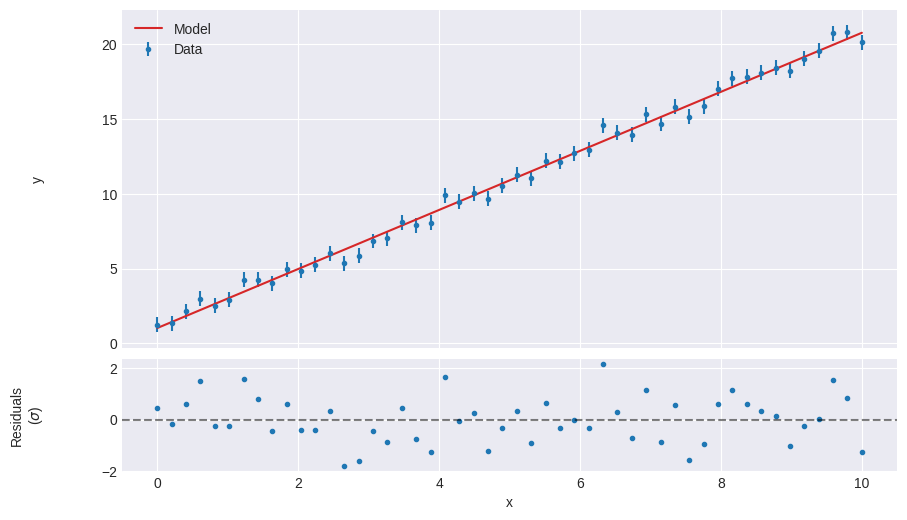

In [ ]:
# Fit the data - that's it!
model, ax, ax_res = df.fit(line, "x", "y", "yerr")

plt.show()

## 5. Examine the Results

The fit automatically creates a plot showing:

- The data with error bars
- The fitted model line
- Residuals (difference between data and model)

Let's also print the fit results:


In [ ]:
print(model)

line
m : (value = 1.97 ± 0.024, bounds = (-inf, inf))
b : (value = 1.0 ± 0.14, bounds = (-inf, inf))
𝜒2: 41.25708975555785
reduced 𝜒2: 0.8595227032407885
covariance:
[[ 0.0006 -0.0029]
 [-0.0029  0.0194]]
correlation:
[[ 1.     -0.8616]
 [-0.8616  1.    ]]


## 6. Accessing Fit Parameters

You can access individual parameters and their uncertainties:


In [ ]:
print(f"Slope (m): {model['m'].value:.4f} ± {model['m'].err:.4f}")
print(f"Intercept (b): {model['b'].value:.4f} ± {model['b'].err:.4f}")
print(f"\nChi-squared: {model.𝜒2:.2f}")
print(f"Reduced chi-squared: {model.r𝜒2:.4f}")

Slope (m): 1.9710 ± 0.0240
Intercept (b): 1.0322 ± 0.1393

Chi-squared: 41.26
Reduced chi-squared: 0.8595


## 7. Specifying Initial Values and Bounds

Sometimes you want to provide initial guesses or constrain parameters. You can do this by passing dictionaries for each parameter:


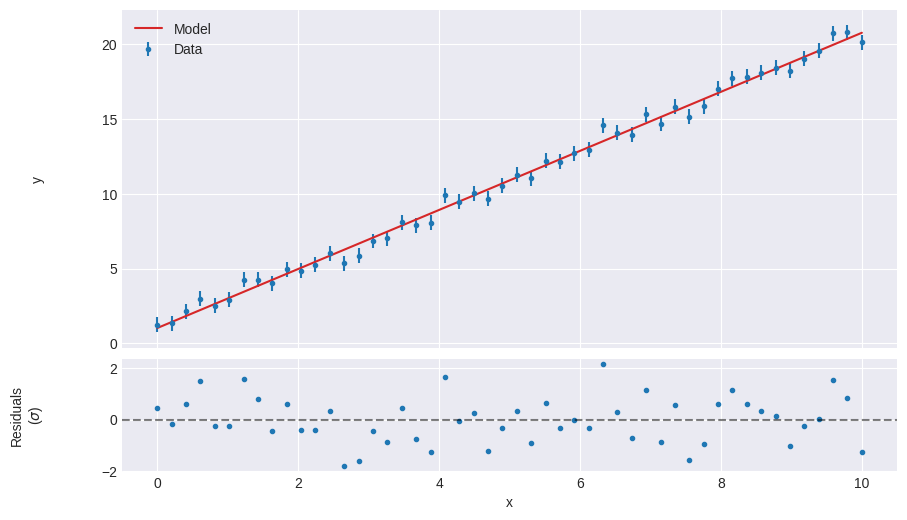


Fit with constraints:
line
m : (value = 1.97 ± 0.024, bounds = (0, 5))
b : (value = 1.0 ± 0.14, bounds = (-2, 3))
𝜒2: 41.257089755557836
reduced 𝜒2: 0.8595227032407883
covariance:
[[ 0.0006 -0.0029]
 [-0.0029  0.0194]]
correlation:
[[ 1.     -0.8616]
 [-0.8616  1.    ]]


In [ ]:
# Fit with initial values and bounds
model2, ax2, ax_res2 = df.fit(
    line,
    "x",
    "y",
    "yerr",
    m={"value": 1.5, "min": 0, "max": 5},  # Slope must be positive
    b={"value": 0.0, "min": -2, "max": 3},  # Intercept bounds
)

plt.show()
print("\nFit with constraints:")
print(model2)

## 8. Fitting Without Error Bars

If your data doesn't have error bars, you can still fit it:


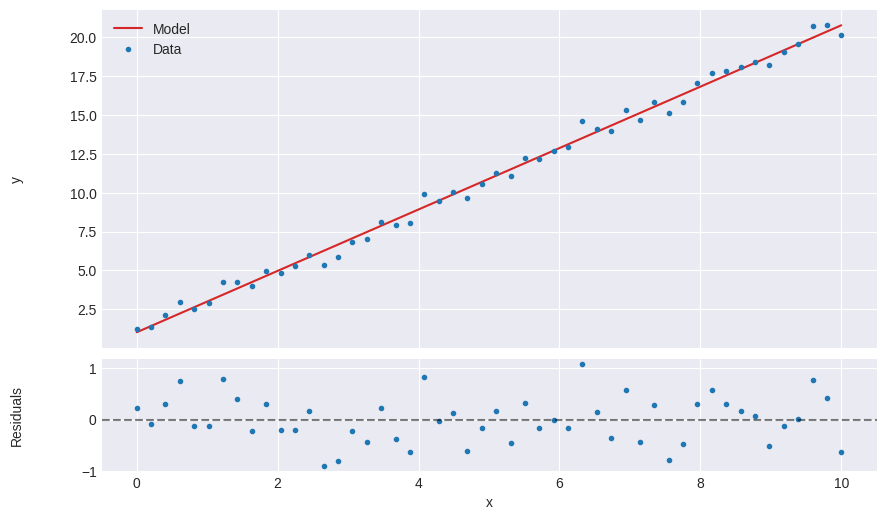

line
m : (value = 1.97 ± 0.022, bounds = (-inf, inf))
b : (value = 1.0 ± 0.13, bounds = (-inf, inf))
𝜒2: inf
reduced 𝜒2: inf
covariance:
[[ 0.0005 -0.0025]
 [-0.0025  0.0167]]
correlation:
[[ 1.     -0.8616]
 [-0.8616  1.    ]]


In [ ]:
# Create data without error column
df_no_err = df[["x", "y"]].copy()

# Fit without error bars
model3, ax3, _ = df_no_err.fit(line, "x", "y")

plt.show()
print(model3)

## 9. Try It Yourself!

Now try fitting a different model. Let's fit an exponential decay:

$$y = A e^{-\lambda x} + B$$

where:

- $A$ is the initial amplitude
- $\lambda$ is the decay rate
- $B$ is the baseline


<Axes: xlabel='x', ylabel='y'>

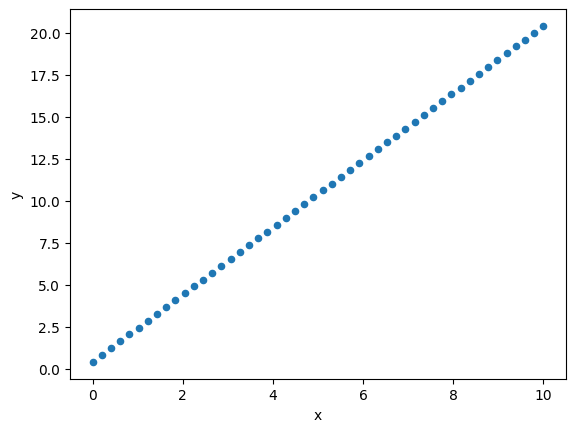

In [ ]:
from ezfit.examples import generate_linear_data

df_

c:\Users\hduva\.projects\ezfit\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='xlog', ylabel='ylog'>

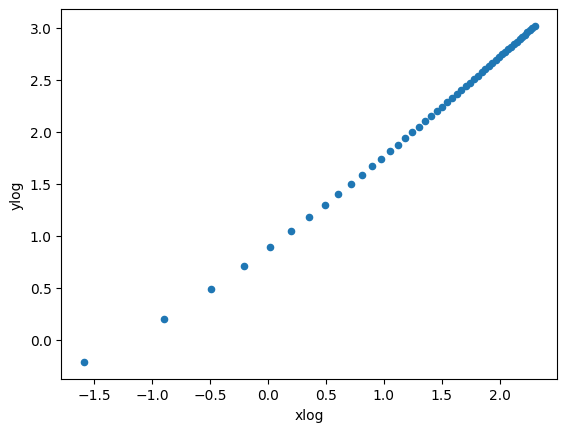

In [9]:
import numpy as np

df_line["xlog"] = np.log(df_line["x"])
df_line["ylog"] = np.log(df_line["y"])
df_line.plot(x="xlog", y="ylog", kind="scatter")

## Summary

In this tutorial, you learned:

1. ✅ How to generate and load data into pandas DataFrames
2. ✅ How to define model functions
3. ✅ How to fit data using `df.fit()`
4. ✅ How to access fit results and parameters
5. ✅ How to specify initial values and bounds

**Next Steps:**

- Try the intermediate tutorial to learn about different optimization methods
- Experiment with your own data
- Explore the built-in model functions in `ezfit.functions`
